In [78]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as mp
import matplotlib.patches as patch
from PIL import Image, ImageDraw, ImageFilter
import cv2 as cv
import rawpy as raw
import rawpy.enhance
from skimage import exposure
from tqdm import tnrange, tqdm_notebook as tqdm
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [93]:
raw_img = raw.imread('dsc_5476.nef')
img = raw_img.postprocess(use_camera_wb=True, 
                          output_bps=8)
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img = cv.resize(img, (100, 150))
# cv.imwrite('original.png', img)

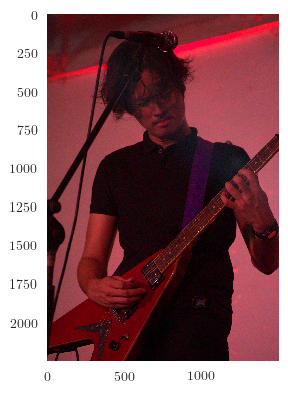

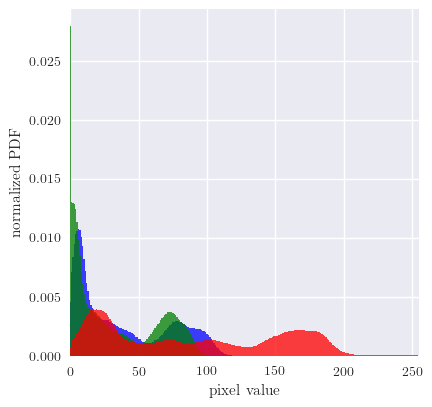

In [5]:
mp.imshow(img[:,:,::-1])
mp.grid(0)
mp.show()

mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze([cv.calcHist([img], [i], None, [256], [0, 255]) for i in range(3)])/img.size
for ch, col in zip(hist, ['b', 'g', 'r']):
    mp.bar(range(256), ch, width=1.0, color=col, alpha=0.75)
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
# mp.savefig('orig_hist.png', dpi=300, bbox_inches='tight')
mp.show()

# Contrast stretching

In [69]:
img = img.astype('float64')/255

In [70]:
print('Red max:', img.T[2].max())
print('Green max:', img.T[1].max())
print('Blue max:', img.T[0].max())

Red max: 1.0
Green max: 1.0
Blue max: 1.0


In [71]:
img_cs = img.copy()
p = 0.05
for i in range(img.shape[2]):
    lo, hi = np.percentile(img.T[i], p), np.percentile(img.T[i], 100-p)
    img_cs.T[i] = (img.T[i] - lo)/(hi - lo) * img.T[i].max() + img.T[i].min()

In [72]:
img_cs = (img_cs*255).astype('uint8')
cv.imwrite('contrast_stretch.png', img_cs)

True

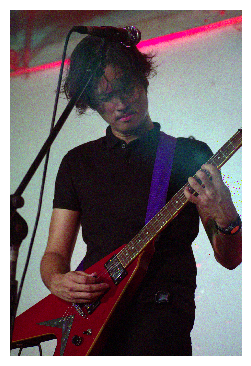

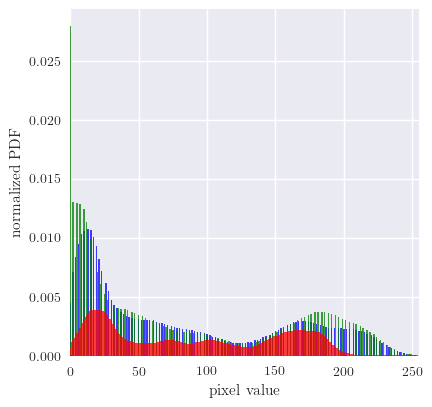

In [74]:
mp.imshow(img_cs[:,:,::-1])
mp.axis('off')
mp.show()

mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze([cv.calcHist([img_cs], [i], None, [256], [0, 255]) for i in range(3)])/img_cs.size
for ch, col in zip(hist, ['b', 'g', 'r']):
    mp.bar(range(256), ch, width=1.0, color=col, alpha=0.75)
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
# mp.savefig('cs_hist.png', dpi=300, bbox_inches='tight')
mp.show()

# Gray World

In [80]:
Bave, Gave, Rave = [img.T[i].mean() for i in range(img.shape[2])]
Aave = np.mean([Bave, Gave, Rave])
print('Red avg:', Rave)
print('Green avg:', Gave)
print('Blue avg:', Bave)
print('All avg:', Aave)

Red avg: 0.3614200122004354
Green avg: 0.12691300159767602
Blue avg: 0.15280919099491658
All avg: 0.21371406826434267


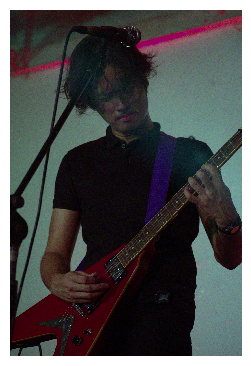

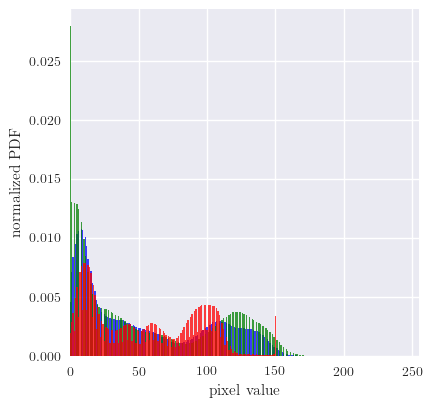

In [82]:
img_gw = img.copy()
for i in range(img.shape[2]):
    img_gw.T[i] = img_gw.T[i]/img_gw.T[i].mean() * Aave

img_gw = (img_gw*255).astype('uint8')
cv.imwrite('grayworld.png', img_gw)    

mp.imshow(img_gw[:,:,::-1])
mp.axis('off')
mp.show()

mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze([cv.calcHist([img_gw], [i], None, [256], [0, 255]) for i in range(3)])/img_gw.size
for ch, col in zip(hist, ['b', 'g', 'r']):
    mp.bar(range(256), ch, width=1.0, color=col, alpha=0.75)
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
# mp.savefig('gw_hist.png', dpi=300, bbox_inches='tight')
mp.show()

# White Patch

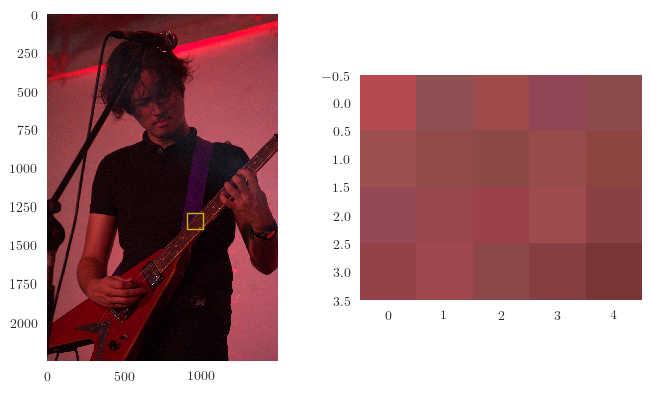

In [83]:
pat = patch.Rectangle((957-50, 1336-50), 962-957+100, 1340-1336+100, fill=False, alpha=1, lw=1, ec='y')
fig = mp.figure()
ax = fig.add_subplot(121)
ax.imshow(img[:,:,::-1])
ax.add_patch(pat)
ax.grid(0)

white = img[1336:1340, 957:962]
ax = fig.add_subplot(122)
ax.imshow(white[:,:,::-1])
ax.grid(0)

# mp.savefig('patch.png', dpi=300, bbox_inches='tight')
mp.show()

In [84]:
Bw, Gw, Rw = [white[:,:,i].mean() for i in range(white.shape[2])]
Aw = np.mean([Bw, Gw, Rw])
print('Red average:', Rw)
print('Green average:', Gw)
print('Blue average:', Bw)
print('All average:', Aw)

Red average: 0.580392156862745
Green average: 0.2774509803921569
Blue average: 0.29411764705882354
All average: 0.38398692810457513


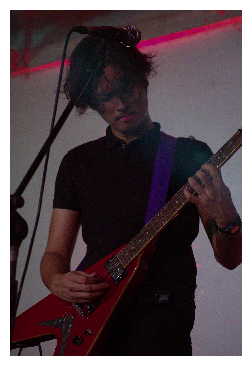

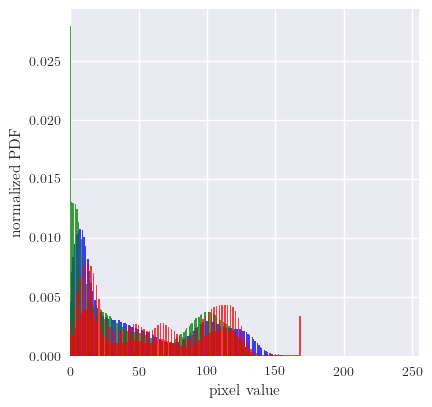

In [86]:
img_wp = img.copy()
for i in range(img.shape[2]):
    img_wp.T[i] = img.T[i]/white.T[i].mean() * Aw

img_wp = (img_wp*255).astype('uint8')
cv.imwrite('whitepatch.png', img_wp)

mp.imshow(img_wp[:,:,::-1])
mp.axis('off')
mp.show()

mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze([cv.calcHist([img_wp], [i], None, [256], [0, 255]) for i in range(3)])/img_wp.size
for ch, col in zip(hist, ['b', 'g', 'r']):
    mp.bar(range(256), ch, width=1.0, color=col, alpha=0.75)
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
# mp.savefig('wp_hist.png', dpi=300, bbox_inches='tight')
mp.show()

# AWBAAET

In [30]:
class AWBAAET:
    
    def contrastStretchMod(self, img, p=0.05):
        try:
            img_type = self.datatype
        except AttributeError:
            img_type = str(img.dtype)
        if 'int' in img_type:
            img = img.astype('float64') / np.iinfo(img_type).max
        img_cs = img.copy()
        for i in range(img.shape[2]):
            lo, hi = np.percentile(img.T[i], p), np.percentile(img.T[i], 100-p)
            img_cs.T[i] = (img.T[i] - lo)/(hi - lo) * img.T[i].max() + img.T[i].min()
        img_cs = (img_cs * np.iinfo(img_type).max).astype(img_type)
        return img_cs


    def grayWorld(self, img):
        try:
            img_type = self.datatype
        except AttributeError:
            img_type = str(img.dtype)
        if 'int' in img_type:
            img = img.astype('float64') / np.iinfo(img_type).max
        img_gw = img.copy()
        Bave, Gave, Rave = [img.T[i].mean() for i in range(img.shape[2])]
        Aave = np.mean([Bave, Gave, Rave])
        for i in range(img.shape[2]):
            img_gw.T[i] = img_gw.T[i] * Aave/img.T[i].mean()
        img_gw = (img_gw * np.iinfo(img_type).max).astype(img_type)
        return img_gw
    
    
    def grayWorldMod(self, img):
        try:
            img_type = self.datatype
        except AttributeError:
            img_type = str(img.dtype)
        if 'int' in img_type:
            img = img.astype('float64') / np.iinfo(img_type).max
        img_gw = img.copy()
        Bave, Gave, Rave = [img.T[i].mean() for i in range(img.shape[2])]
        Aave = np.mean([Bave, Gave, Rave])
        for i in range(img.shape[2]):
            img_gw.T[i] = img_gw.T[i] + (Aave - img_gw.T[i].mean())
        img_gw = (img_gw * np.iinfo(img_type).max).astype(img_type)
        return img_gw


    def weightDecision(self, img, n=200):
        img_type = self.datatype
        if 'int' in img_type:
            img = img.astype('float32') / np.iinfo(img_type).max
        channel_std = np.array([img.T[i].std() for i in range(img.shape[2])])
        img = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
        x = abs(img.T[2].mean() - img.T[1].mean())
#         weight = n*x/(max(img.T[2].mean(), img.T[1].mean()))
        weight = (abs(img.T[2].mean() - img.T[1].mean()) + abs(max(channel_std) - min(channel_std)))/n
        self.weight = weight
        return weight


    def main(self, img, p=0.05, n=200):
        if type(img) == str:
            img = cv.imread(img)
        elif type(img) == np.ndarray:
            pass
        else:
            raise NotImplementedError
        self.img = img
        self.datatype = str(img.dtype)
        img_hs = self.contrastStretchMod(img, p)
        img_gw = self.grayWorldMod(img)
        w = self.weightDecision(img, n)
        out = w*img_hs + (1 - w)*img_gw
        out = out.astype(self.datatype)
        self.out = out

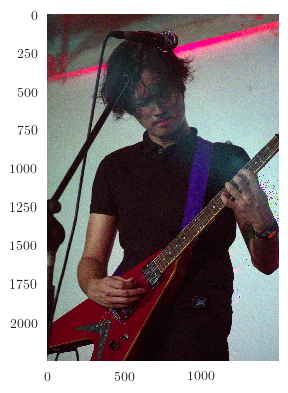

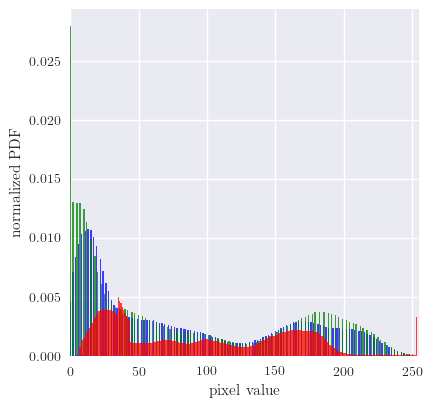

0.9678671072269309


In [39]:
awb = AWBAAET()
awb.main(img, p=0.1, n=0.29)
img_awb = awb.out
cv.imwrite('awbaaet_out.png', img_awb)

mp.imshow(img_awb[:,:,::-1])
mp.grid(0)
mp.show()

mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze([cv.calcHist([img_awb], [i], None, [256], [0, 255]) for i in range(3)])/img_awb.size
for ch, col in zip(hist, ['b', 'g', 'r']):
    mp.bar(range(256), ch, width=1.0, color=col, alpha=0.75)
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
mp.savefig('awbaaet_hist.png', dpi=300, bbox_inches='tight')
mp.show()

print(awb.weight)

# AWBSACSMD

In [94]:
class AdaptiveAWB:
    def __init__(self, img):
        self.orig = img
        self.img = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
        self.Y_thr = np.linspace(0, 255, 15, dtype='uint8')
        self.Cr_thr = Y_thr.copy()
        self.Cb_thr = Y_thr.copy()
        self.TY, self.TCr, self.TCb = np.zeros(14, dtype='uint8'), np.zeros(14, dtype='uint8'), np.zeros(14, dtype='uint8')
        self.N = np.zeros(14, dtype='uint8')
        self.STY, self.STCr, self.STCb = 0, 0, 0
        
        
    def divide14(self):
        for Y in tnrange(self.img.T[0].size, desc='Y channel', leave=False):
            for Cr in tnrange(self.img.T[1].size, desc='Cr channel', leave=False):
                for Cb in tnrange(self.img.T[2].size, desc='Cb_channel', leave=False):
                    for i in range(1, len(self.Y_thr)):
                        if self.Y_thr[i-1] < self.img.T[0].flat[Y] and \
                           self.Cr_thr[i-1] < self.img.T[1].flat[Cr] < self.Cr_thr[i] and \
                           self.Cb_thr[i-1] < self.img.T[2].flat[Cb] < self.Cb_thr[i]:
                            self.TY[i-1] += self.img.T[0].flat[Y]
                            self.TCr[i-1] += self.img.T[1].flat[Cr]
                            self.TCb[i-1] += self.img.T[2].flat[Cb]
                            self.N[i-1] += 1
                        else:
                            continue
                            
        N = self.N
        Ncolor = np.sort(rand.choice(self.img.size, int(self.img.size*0.20), replace=False))
        SN = np.sum(self.img.flat[Ncolor])
        Ncond = (N[0] + N[1] > N[2] + N[3] + N[4]) and (N[0] > N[1] + N[2])
        if Ncond is True:
            run_idx = 14
        else:
            run_idx = 2
            
        while Ncond is False:
            SN = 0
            for k in range(run_idx):
                SN += N[i]
            run_idx += 1
        self.N = N
        
        for k in range(run_idx):
            self.STY = np.sum(self.TY)
            self.STCr = np.sum(self.TCr)
            self.STCb = np.sum(self.TCb)
            
        self.Yave = self.STY/SN
        self.Crave = self.STCr/SN
        self.Cbave = self.STCb/SN
        
        self.Rs = 1.164 * (self.Yave - 16) + 1.596 * (self.Crave - 128)
        self.Gs = 1.164 * (self.Yave - 16) - 0.813 * (self.Crave - 128) - 0.391 * (self.Cbave - 128)
        self.Bs = 1.164 * (self.Yave - 16) + 2.018 * (self.Crave - 128)
        
        self.Rgain = self.Gs/self.Rs
        self.Ggain = 1
        self.Bgain = self.Gs/self.Bs
        gains = [self.Bgain, self.Ggain, self.Rgain]
        
        self.awb = np.dstack([self.orig.T[i] * gains[i] for i in range(self.orig.shape[2])])
        
        
    def main(self):
        self.divide14()
        mp.imshow(self.awb[:,:,::-1])
        mp.axis('off')
        mp.show()

In [ ]:
awb = AdaptiveAWB(img)
awb.main()